In [23]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

customers = pd.read_csv('Mall_Customers (1).csv')
customers


Saving Mall_Customers (1).csv to Mall_Customers (1) (2).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
X = customers.iloc[:,2:]
X.head

<bound method NDFrame.head of      Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]>

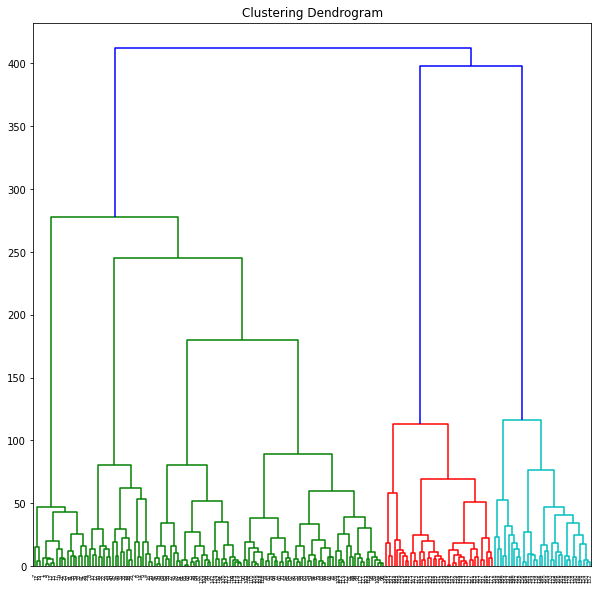

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X, 'ward')

fig = plt.figure(figsize=(10, 10))
plt.title('Clustering Dendrogram')
dn = dendrogram(Z)

In [26]:
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt
label = fcluster(Z, 210, criterion='distance')
customers['pred_scipy'] = label
np.unique(label)


array([1, 2, 3, 4, 5], dtype=int32)

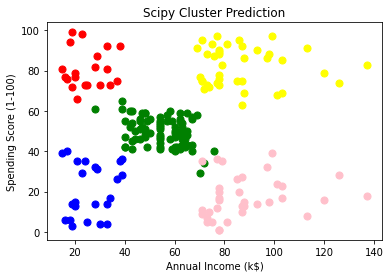

In [27]:
plt.scatter(customers.loc[label==1, 'Annual Income (k$)'], customers.loc[label==1, 'Spending Score (1-100)'], s=50, marker='o', color='red')
plt.scatter(customers.loc[label==2, 'Annual Income (k$)'], customers.loc[label==2, 'Spending Score (1-100)'], s=50, marker='o', color='blue')
plt.scatter(customers.loc[label==3, 'Annual Income (k$)'], customers.loc[label==3, 'Spending Score (1-100)'], s=50, marker='o', color='green')
plt.scatter(customers.loc[label==4, 'Annual Income (k$)'], customers.loc[label==4, 'Spending Score (1-100)'], s=50, marker='o', color='yellow')
plt.scatter(customers.loc[label==5, 'Annual Income (k$)'], customers.loc[label==5, 'Spending Score (1-100)'], s=50, marker='o', color='pink')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scipy Cluster Prediction')
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

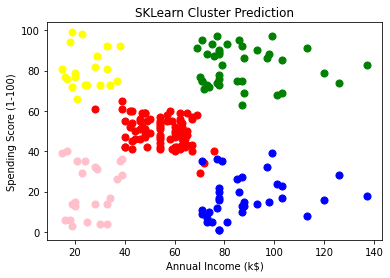

In [32]:
X['pred_sklearn'] = y_hc
plt.scatter(X.loc[y_hc==0, 'Annual Income (k$)'], X.loc[y_hc==0, 'Spending Score (1-100)'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'Annual Income (k$)'], X.loc[y_hc==1, 'Spending Score (1-100)'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'Annual Income (k$)'], X.loc[y_hc==2, 'Spending Score (1-100)'], s=50, marker='o', color='green')
plt.scatter(X.loc[y_hc==3, 'Annual Income (k$)'], X.loc[y_hc==3, 'Spending Score (1-100)'], s=50, marker='o', color='yellow')
plt.scatter(X.loc[y_hc==4, 'Annual Income (k$)'], X.loc[y_hc==4, 'Spending Score (1-100)'], s=50, marker='o', color='pink')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('SKLearn Cluster Prediction')
plt.show()